# ********  IPL Dataset Analysis  ********

<img src='https://drive.google.com/uc?id=1DW0D2AfGz4Sgx1Ib7WOerCPH300HpclC' >

https://drive.google.com/uc?id=

In [1]:
# Importing the Useful Libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Loading Datatsets.

try:
    df_matches = pd.read_csv('input/matches.csv')
    df_deliveries = pd.read_csv('input/deliveries.csv')
except Exception as e:
    df_matches = pd.read_csv('../input/matches.csv')
    df_deliveries = pd.read_csv('../input/deliveries.csv')   

In [3]:
# Removing the unwanted columns.
try:
    df_matches.drop('umpire3', axis=1, inplace=True)
except Exception as e:
    pass


In [4]:
# Let's checkout the top 5 entries of our Dataset.
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


#### ====================================================================================================

## BAISC ANALYSIS

### Q1). Number of Matches played so far and Number of seasons played so far.

In [5]:
print(f"The Number of matches played so far are:-\t {df_matches.shape[1]}")
print(f"The number of seasons played so far are:-\t {df_matches['season'].nunique()}")

The Number of matches played so far are:-	 17
The number of seasons played so far are:-	 10


### Q2). Number of matches in each season.

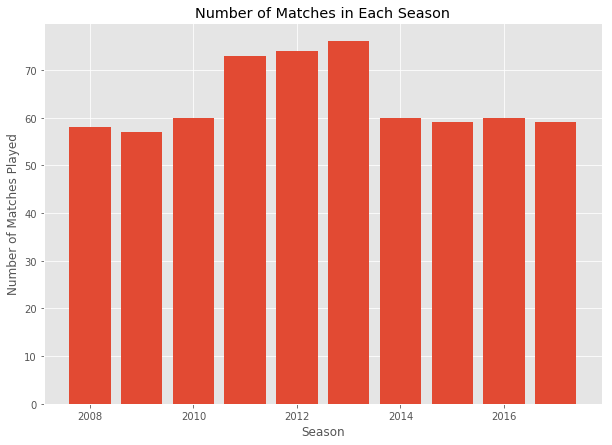

In [6]:
season = df_matches['season'].value_counts()
plt.figure(figsize=(10,7))
plt.bar(x=season.index, height=season.values)
plt.title('Number of Matches in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches Played')
plt.show()

* As one can see maximum number of matches played in 2011, 2012, 2013. This is the time was in very high demand.

#### =====================================================================================================

### Q3). Number of Matches in each Venue.

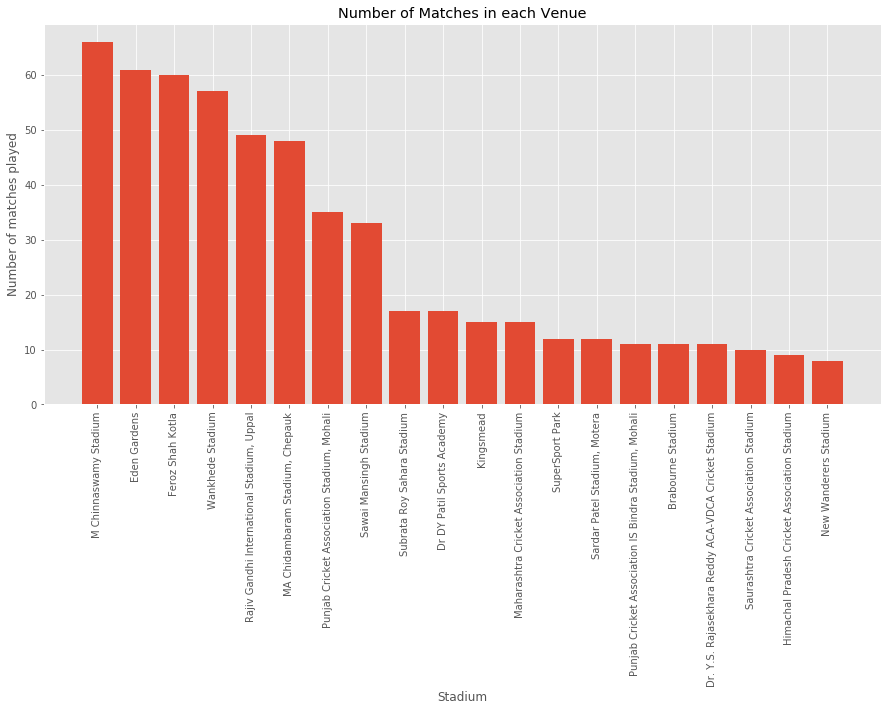

In [7]:
venue = df_matches['venue'].value_counts()[:20]
plt.figure(figsize=(15,7))
plt.bar(x=venue.index, height=venue.values)
plt.title('Number of Matches in each Venue')
plt.xlabel('Stadium')
plt.ylabel('Number of matches played')
plt.xticks(rotation=90)
plt.show()

* The maximum matches played on M Chinnaswamy stadium.
* Other favuorite stadiums are Eden Gardens(Lords of India :p) , Feroz Shah Kotla, Wankhede stadium.

#### =====================================================================================================

### Q4). Number of matches played by each team.

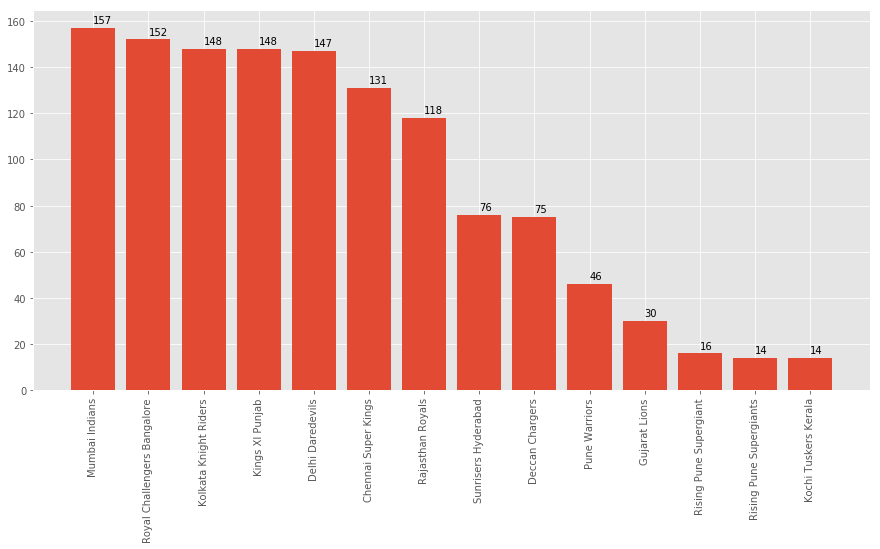

In [8]:
temp_df = pd.concat([df_matches['team1'], df_matches['team2']])

temp_df = temp_df.value_counts()

plt.figure(figsize=(15,7))
plt.bar(x=temp_df.index, height=temp_df.values,)
plt.xticks(rotation=90)

for i,v in enumerate(temp_df.values):
    plt.text(x=i, y=v+2, s=v)
    
plt.show()    

* Maximum number of matches played by Mumbai Indians, RCB, KKR.

#### ====================================================================================================

### Q5). Number of Total Matches wins per Team.

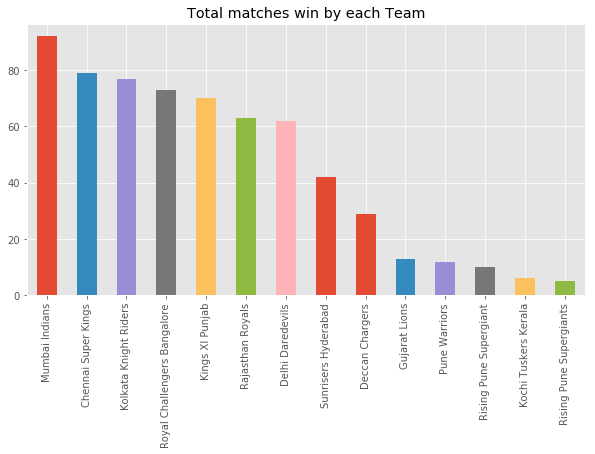

In [9]:
winner = df_matches['winner'].value_counts()
winner.plot(kind='bar', figsize=(10,5), title='Total matches win by each Team')
plt.show()

#### The conclusions from figrue:-
* Mumbai Indians leads the total matches won by a team.
* Chennai Super kings,KKR they are also in a race.
* RR and DD they are far behind

#### =====================================================================================================

### Q6). Champion in each season.

In [10]:
temp_df = df_matches.drop_duplicates('season', keep='last')
temp_df = temp_df[['season', 'winner']]
temp_df.sort_values('season',inplace=True)
temp_df.reset_index(inplace=True, drop=True)
temp_df

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


#### ====================================================================================================

### Q7). Number of times each team played final and number of times they won matches.

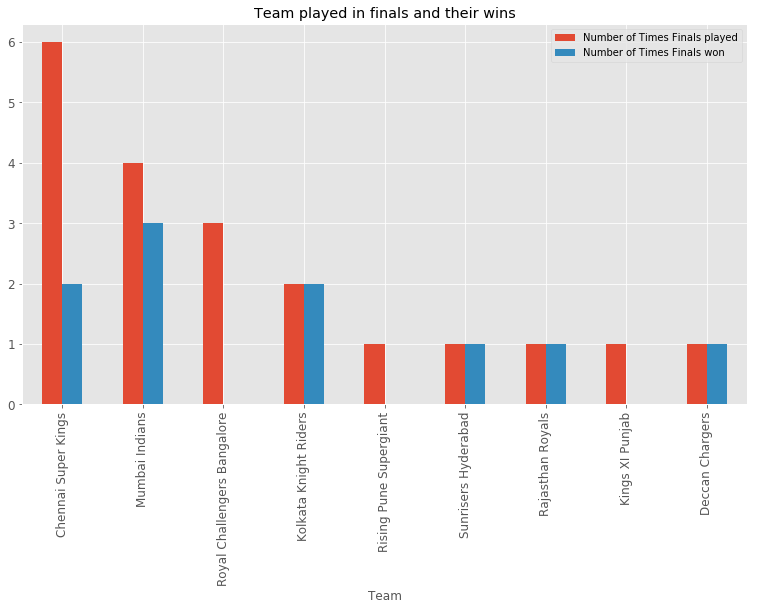

In [20]:
finals = df_matches.drop_duplicates('season', keep='last')
finals = finals[['season', 'team1', 'team2', 'winner', ]]

# Teams who reaches maximum number of finals
most_finals  =pd.concat([finals['team1'], finals['team2']])
most_finals = most_finals.value_counts().reset_index()
most_finals = pd.DataFrame(most_finals)
most_finals.columns = ['Team', 'final_count']

# Teams who won the final.
win_finals = finals['winner'].value_counts().reset_index()
win_finals = pd.DataFrame(win_finals,)

most_finals = most_finals.merge(win_finals, left_on='Team',right_on='index', how='outer')
most_finals.drop('index', axis=1,inplace=True)
most_finals.set_index('Team', drop=True, inplace=True)
most_finals.columns = ['Number of Times Finals played', 'Number of Times Finals won']
most_finals.plot(kind='bar', figsize=(13,7),fontsize=12, title='Team played in finals and their wins')
plt.show()

* Chennai super kings played the maximum number of times 6 in finals. (CSK rocks)
* And Mumbai Indians won 4 seasons, which is the maximum number of times a team won IPL

#### ====================================================================================================

### Q8). Top 10 players who won the maximum number of times , Man of the match title.

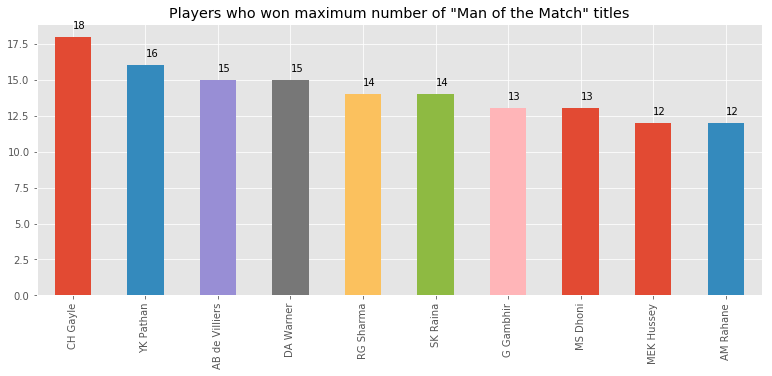

In [25]:
pom = df_matches['player_of_match'].value_counts()[:10]
pom.plot(kind='bar', figsize=(13,5), title='Players who won maximum number of "Man of the Match" titles')
for i,v in enumerate(pom.values):
    plt.text(x=i, y=v+0.6, s=v)

#### The conclusions from the figure:-
* As expected , CH Gayle have maximum number of man of the match titles.  <img src='63839803.jpg' width=200 >
* Till 2017, Virat Kohli is even not in top 10.
* MS Dhoni have won 13 man of the match titles.
* One important thing to notice, YK Pathan have won 16 titles as he is not in top 5 leading run scorers.

#### ====================================================================================================

### Q9). Top 10 Favourite Umpires.

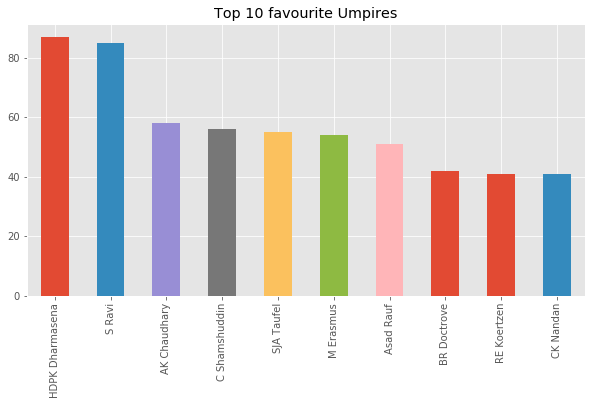

In [27]:
umpire = pd.concat([df_matches['umpire1'], df_matches['umpire2']]).value_counts()[:10]
umpire.plot(kind='bar',title='Top 10 favourite Umpires', figsize=(10,5))
plt.show()

#### ====================================================================================================

### Q10). Top 5 Winner team who defeated the Losser team with the highest number of run Difference.

In [46]:
run_diff = df_matches.sort_values('win_by_runs', ascending=False)[:5]
run_diff[['season', 'team1','team2', 'winner', 'win_by_runs', 'venue']].reset_index(drop=True)

,season,team1,team2,winner,win_by_runs,venue
0,2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians,146,Feroz Shah Kotla
1,2016,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore,144,M Chinnaswamy Stadium
2,2008,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,140,M Chinnaswamy Stadium
3,2015,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,138,M Chinnaswamy Stadium
4,2013,Royal Challengers Bangalore,Pune Warriors,Royal Challengers Bangalore,130,M Chinnaswamy Stadium


* RCB defeated the rival team 3 times with big margin of runs.


#### ==================================================================================================

### Q11). Top 5 Winner team who defeated the Losser team with the highest number of wickets in their hand.

In [47]:
wicket_max = df_matches.sort_values('win_by_wickets', ascending=False)[:5]
wicket_max[['season', 'team1','team2', 'winner', 'win_by_wickets', 'venue']].reset_index(drop=True)

,season,team1,team2,winner,win_by_wickets,venue
0,2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,10,M Chinnaswamy Stadium
1,2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,10,Wankhede Stadium
2,2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,10,Dr DY Patil Sports Academy
3,2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,10,"Punjab Cricket Association IS Bindra Stadium, ..."
4,2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,10,Feroz Shah Kotla


* RCB is also there with 2 times win over rival team.
* But unfortunate for RCB they didn't win any Season Title.


#### ====================================================================================================
#### ====================================================================================================


## TOSS ANALYSIS

### Q12).  Toss decision whether Captain choose bat or ball.

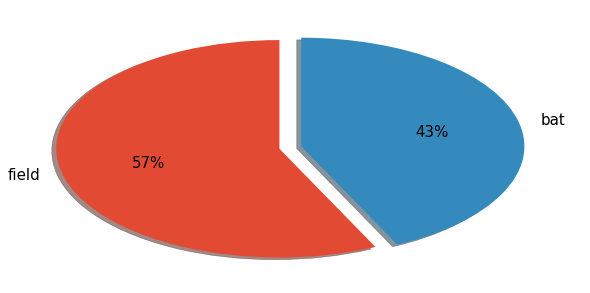

In [57]:
toss_decision = df_matches['toss_decision'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(labels=toss_decision.index, x=toss_decision.values, explode=[0.1,0], autopct='%.f%%',
        shadow=True,startangle=90, textprops={'fontsize':15})
plt.show()

* 57% Captains choose to field first.
* I think they love to chase a target.

#### ====================================================================================================

### Q13). Total Toss won by each team and total matches played by them. 

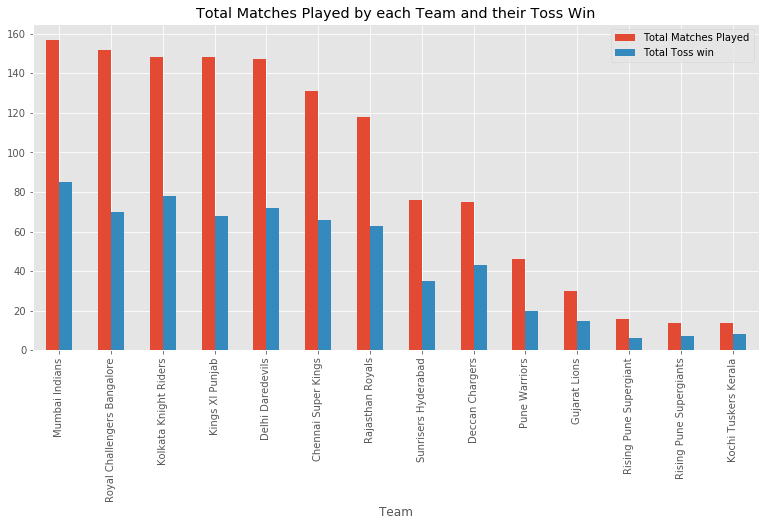

In [75]:

toss_team = pd.concat([df_matches['team1'], df_matches['team2']]).value_counts().reset_index()
toss_team = pd.DataFrame(toss_team)
toss_team.columns = ['Team', 'Total Matches Played']

toss_winner = df_matches['toss_winner'].value_counts().reset_index()
toss_winner = pd.DataFrame(toss_winner)

# merging to DataFrame.
toss_team = toss_team.merge(toss_winner, how='outer', left_on='Team', right_on='index')
toss_team.drop('index', axis=1, inplace=True)
toss_team.columns = ['Team', 'Total Matches Played', 'Total Toss win']

toss_team.set_index('Team', inplace=True)
toss_team.plot(kind='bar', title="""Total Matches Played by each Team and their Toss Win""", figsize=(13,6))
plt.show()

* Mumbai Indian won maximum number of tosses and it played maximum matches also.

#### ====================================================================================================

### Q14). Is toss winner also match winner.

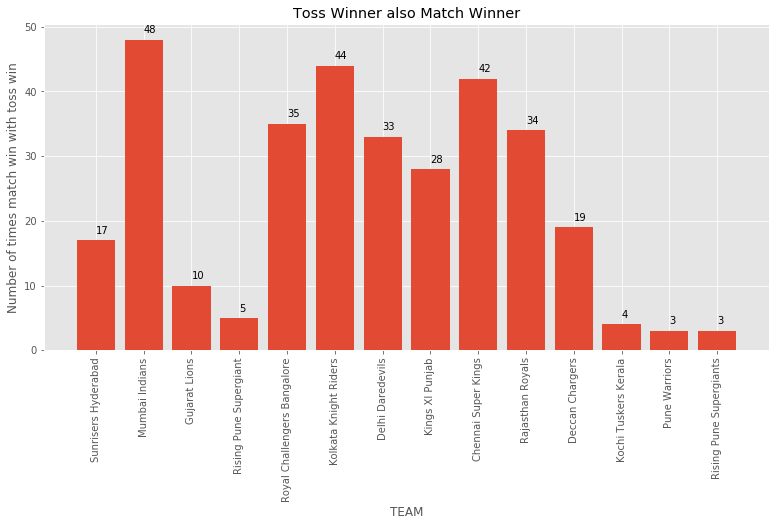

In [88]:
team = df_matches['team1'].unique()

toss_match_winner = []
for var in team:
    count = df_matches[(df_matches['toss_winner'] == var) & (df_matches['winner'] == var)]['id'].count()
    toss_match_winner.append(count)
    
plt.figure(figsize=(13,6))
plt.bar(x=team, height=toss_match_winner)
plt.xticks(rotation=90)
plt.title('Toss Winner also Match Winner')
plt.xlabel('TEAM')
plt.ylabel('Number of times match win with toss win')

for i,v in enumerate(toss_match_winner):   # This is to provide label on bar with their actual value.
    plt.text(x=i, y=v+1, s=v)
plt.show()

* Here also Mumbai Indian leads with 48 matches win with toss win.
* KKR and CSK, they are also not far away from MI. They are at 44, 42 respectively.